# Индивидуальное задание

>Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения трехмерного графика.

В двух областях есть по 50 рабочих, каждый из которых готов трудиться по 10 часов в сутки на добыче алюминия или никеля. В первой области один рабочий за час добывает 0,2 кг алюминия или 0,1 кг никеля. Во второй области для добычи $х$ кг алюминия в день требуется $x^2$ человеко-часов труда, а для добычи $у$ кг никеля в день требуется $y^2$ человеко-часов труда.  
Обе области поставляют добытый металл на завод, где для нужд промышленности производится сплав алюминия и никеля, в котором на 1 кг алюминия приходится 2 кг никеля. При этом области договариваются между собой вести добычу металлов так, чтобы завод мог произвести наибольшее количество сплава. Сколько килограммов сплава при таких условиях ежедневно сможет произвести завод?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Для формализации условия подобных задач введем следующие обозначения и выражения.  
$r$ – продолжительность рабочего дня;  
$n$ – количество рабочих, занятых по добыче конкретного металла;  
$р$ – масса металла, добываемого одним рабочим в час (производительность);  
$r∙n$ – человеко-часы;  
$r∙n∙ p$ – масса металла, добываемого на шахте в день

In [2]:
r_1 = r_2 = 10
n_1 = n_2 = 50
p_1_Al = 0.2
p_1_Ni = 0.1

Так как требуется распределить рабочих в каждой шахте так, чтобы произвести наибольшее количество сплава, то вводим переменные: для первой шахты $х$ – количество рабочих, которые добывают $Al$, тогда $(50–х)$ – количество рабочих, добывающих $Ni$. Для второй шахты: $у$ – количество рабочих, которые добывают $Al$, тогда $(50–у)$ – количество рабочих, добывающих $Ni$.  
Так как во второй области для добычи $х$ кг алюминия в день требуется $x^2$ человеко-часов труда, то вид зависимости между человеко-часами и массой добываемого в день металла имеет вид $(rn)^2 = rnp$ или $rn=\sqrt{rnp}$.

 На основе данных задачи составим таблицу: 

|№ области | Всего рабочих | r | $Al, rnp$ | $Ni, rnp$| 
| --- | --- | --- | --- | --- |
|1 | 50 | 10 | $0.2 \times 10 \times x$ | $0.1 \times 10 \times (50 - x)$|
|2 | 50 | 10 | $\sqrt{10 \times y}$ | $\sqrt{10 \times (50 - y)}$|
| | Всего в двух областях | | $0.2 \times 10 \times x + \sqrt{10 \times y}$ | $0.1 \times 10 \times (50 - x) + \sqrt{10 \times (50 - y)}$

Так как для нужд промышленности производится сплав алюминия и никеля, в котором на 1 кг алюминия приходится 2 кг никеля, то масса никеля в сплаве в 2 раза больше массы алюминия, то есть:
\begin{equation}
0.1 \times 10 \times (50 - x) + \sqrt{10 \times (50 - y)} = 2 \times (0.2 \times 10 \times x + \sqrt{10 \times y})
\end{equation}
Выразим $x$ и $y$:

In [3]:
y = np.arange(0, 51, 1)
x = [(n_1 / 5 + np.sqrt(p_1_Al * r_1 * (n_2 - y)) / 5 - 2 * np.sqrt(r_2 * y) / 5) for y in y]

Составим функцию $f(x, y)$, которая задает значения массы сплава. Масса сплава в 3 раза больше массы алюминия, следовательно:
\begin{equation}
f(x, y) = 3 \times (2x + \sqrt{10y})
\end{equation}

In [4]:
def f(x, y):
    return 3 * (2 * x + np.sqrt(10 * y))

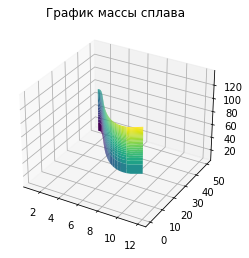

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x_vals = x
y_vals = y
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

ax.plot_surface(x_vals, y_vals, Z, cmap='viridis', edgecolor='none')
ax.set_title('График массы сплава')
plt.show()

Определим массу сплава как точку максимума функции.

In [6]:
mass = round(np.max(Z))
print(f"Максимум массы сплава: {mass} кг")

Максимум массы сплава: 139 кг
